<a href="https://colab.research.google.com/github/Vinayakmoudgil/MLOps/blob/main/Reinforcement%20Learning/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [14]:
import math
N = 10000
d = 10
ad_selected = []
numbers_of_selection = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0,N):
  ad=0
  max_bound = 0
  for i in range(0,d):
    if (numbers_of_selection[i] >0):
      avg_round = sums_of_rewards[i] / numbers_of_selection[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selection[i])
      upper_bound= avg_round + delta_i
    else: 
      upper_bound = 1e400
    if (upper_bound > max_bound):
      max_bound = upper_bound
      ad = i
  ad_selected.append(ad)
  numbers_of_selection[ad] +=1
  reward = df.values[n,ad]
  sums_of_rewards[ad] +=reward
  total_reward += reward
print(total_reward,sums_of_rewards,numbers_of_selection)

2178 [120, 47, 7, 38, 1675, 1, 27, 236, 20, 7] [705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]


## Visualising the results

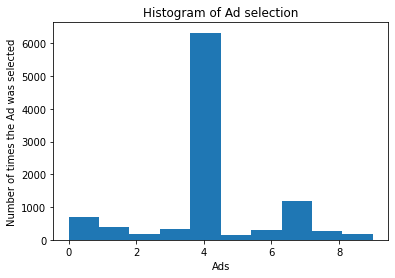

In [11]:
plt.hist(ad_selected)
plt.title('Histogram of Ad selection')
plt.xlabel('Ads')
plt.ylabel('Number of times the Ad was selected')
plt.show()